Ce document a été produit dans le but de produire des données sur l'incidence du cancer en Afrique. Travail réalisé par Yosr Hamdi, Ali Afzal Zatchi, Ines Abdeljaoued, Alia Ben Kahla...

In [1]:
import os
import time
from datetime import date, timedelta

import pandas as pd
import numpy as np

import requests 
from bs4 import BeautifulSoup

import io
import re
import itertools
import zipfile

In [2]:
pays = pd.read_excel("PaysdAfrique.xlsx")

In [3]:
pays.head()

,Northern Africa (210 002 000),West Africa (331 255 000),Central Africa (135 750 000),East Africa (373 202 000),Southern Africa (60 425 000)
0,Maroc (35 280 451),Mauritanie (4 166 000),Tchad (14 485 740),Erythree (5 351 000),Namibie (2 513 000)
1,Algerie (40 610 154),Senegal (15 580 485),Centrafrique (4 998 000),Ethiopie (101 850 000),Botswana (2 3003 000)
2,Tunise (11 411 212),Gambie (2 054 000),Cameroun (23 920 400),Ouganda (41 175 440),Afrique du sud (54 975 900)
3,Libye(6 330 000),Guinee Bissau (1 888 000),Guinee Equatoriale (869 000),Kenya (47 450 250),Swaziland (1 220 000)
4,Egypte (93 380 570),Guinee (12 940 000),Gabon (1 763 000),Djibouti (899 000),Lesotho (2 160 000)


In [4]:
evolution = pd.read_excel("regionsAfrique.xlsx")

In [5]:
evolution.head()

,Region,B_C2002,B_C2008,B_C2012,BC_2018,B_C2002Mort,B_C2008Mort,B_C2012Mort,BC_2018Mort,Unnamed: 9,...,Bladder 2018 F,Unnamed: 81,Thyroid 2002 M,Thyroid 2002 F,Thyroid 2008 M,Thyroid 2008 F,Thyroid 2012 M,Thyroid 2012 F,Thyroid 2018 M,Thyroid 2018 F
0,North,23.2,32.7,43.2,48.9,16.7,17.8,17.4,18.4,NaN,...,3.2,NaN,NaN,NaN,NaN,NaN,1.4,4.4,1.6,5.7
1,West,27.8,31.8,38.6,37.3,19.6,19.0,20.1,17.8,NaN,...,1.4,NaN,NaN,NaN,NaN,NaN,0.3,1.0,0.5,1.5
2,Central,16.5,21.3,26.8,27.9,12.1,13.1,14.9,15.8,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,0.7,1.2,0.8,1.3
3,East,19.5,19.3,30.4,29.9,14.1,11.4,15.6,15.4,NaN,...,2.4,NaN,NaN,NaN,NaN,NaN,1.1,2.7,1.1,2.5
4,South,33.4,38.1,38.9,46.2,16.3,19.3,15.5,15.6,NaN,...,1.5,NaN,NaN,NaN,NaN,NaN,0.6,1.6,1.7,6.0


In [6]:
annee = ["2002","2008","2012","2018"]

In [7]:
index = ["North", "West", "Central", "East", "South"]
evolution.index = index
evolution

,Region,B_C2002,B_C2008,B_C2012,BC_2018,B_C2002Mort,B_C2008Mort,B_C2012Mort,BC_2018Mort,Unnamed: 9,...,Bladder 2018 F,Unnamed: 81,Thyroid 2002 M,Thyroid 2002 F,Thyroid 2008 M,Thyroid 2008 F,Thyroid 2012 M,Thyroid 2012 F,Thyroid 2018 M,Thyroid 2018 F
North,North,23.2,32.7,43.2,48.9,16.7,17.8,17.4,18.4,NaN,...,3.2,NaN,NaN,NaN,NaN,NaN,1.4,4.4,1.6,5.7
West,West,27.8,31.8,38.6,37.3,19.6,19.0,20.1,17.8,NaN,...,1.4,NaN,NaN,NaN,NaN,NaN,0.3,1.0,0.5,1.5
Central,Central,16.5,21.3,26.8,27.9,12.1,13.1,14.9,15.8,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,0.7,1.2,0.8,1.3
East,East,19.5,19.3,30.4,29.9,14.1,11.4,15.6,15.4,NaN,...,2.4,NaN,NaN,NaN,NaN,NaN,1.1,2.7,1.1,2.5
South,South,33.4,38.1,38.9,46.2,16.3,19.3,15.5,15.6,NaN,...,1.5,NaN,NaN,NaN,NaN,NaN,0.6,1.6,1.7,6.0


In [8]:
#Incidence Cervix uteri cancer
cervixinc = pd.DataFrame(evolution, columns=['Cervix2002', 'Cervix2008', 'Cervix2012', 'Cervix2018']).transpose()
cervixmort = pd.DataFrame(evolution, columns=['Cervix2002Mort', 'Cervix2008Mort', 'Cervix2012Mort', 'Cervix2018Mort']).transpose()

cervixinc.index = annee
cervixmort.index = annee

fat = cervixmort.div(cervixinc).transpose()*100 # breast cancer fatality 
fat

,2002,2008,2012,2018
North,80.991736,60.606061,48.484848,70.833333
West,81.228669,71.216617,63.139932,77.702703
Central,82.142857,73.913043,72.549020,78.731343
East,81.030445,73.333333,64.637002,74.812968
South,59.162304,55.223881,56.825397,46.403712


In [9]:
cervixinc

,North,West,Central,East,South
2002,12.1,29.3,28.0,42.7,38.2
2008,6.6,33.7,23.0,34.5,26.8
2012,6.6,29.3,30.6,42.7,31.5
2018,7.2,29.6,26.8,40.1,43.1


middle=c("CHA","CAR","CAM","EQG","GAB","CNG","ZAI","ANG")
west=c("CAP","MAU","SEN","GAM","GUB","WES","GIN","SIL","LIB","CDI","MAL","BUF","GHA","TOG","BEN","NIG","NIR")
east=c("MOZ","COM","STP","ERI","ETH","UGA","KEN","DJI","SOM","RWA","BUR","TAN","MAA","ZIM","ZAM","MAD" )

In [10]:
North = ["MAR","DZA","TUN","LBY","EGY","SDN", "SSD"]
South = ["NAM","BWA","ZAF","SWZ","LSO"] 
Central = ["TCD","CAF","CMR","GNQ","GAB","COG","COD","AGO", "STP"]#ok

West = ["MRT","SEN","GMB","GIN","SLE","LBR","GHA","TGO","BEN","NGA", "BFA", "CPV", "CIV", "GNB", "MLI", "NER",'ESH']
East = ["BDI", "COM", "DJI", "ERI", "ETH", "KEN", "MDG", "MWI", "MUS", "MOZ", "RWA", "SYC", "SOM", "UGA", "ZMB", "ZWE", "TZA", "-99"]

In [11]:
len(North), len(Central), len(South)

(7, 9, 5)

In [12]:
len(East), len(West)

(18, 17)

In [13]:
pays.head()

,Northern Africa (210 002 000),West Africa (331 255 000),Central Africa (135 750 000),East Africa (373 202 000),Southern Africa (60 425 000)
0,Maroc (35 280 451),Mauritanie (4 166 000),Tchad (14 485 740),Erythree (5 351 000),Namibie (2 513 000)
1,Algerie (40 610 154),Senegal (15 580 485),Centrafrique (4 998 000),Ethiopie (101 850 000),Botswana (2 3003 000)
2,Tunise (11 411 212),Gambie (2 054 000),Cameroun (23 920 400),Ouganda (41 175 440),Afrique du sud (54 975 900)
3,Libye(6 330 000),Guinee Bissau (1 888 000),Guinee Equatoriale (869 000),Kenya (47 450 250),Swaziland (1 220 000)
4,Egypte (93 380 570),Guinee (12 940 000),Gabon (1 763 000),Djibouti (899 000),Lesotho (2 160 000)


Ajout d'une colonne région (Reg) dans la base 'Africa' (qui est .shp)
Régler ce problème pour la suite des affichages sur la carte

Fonction nous permettant d'ajouter des données d'incidence ou de mortalité ou de fatalité

In [14]:
#!pip install pyshp
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#comuna = 'Tunisia'
#com_id = df[df.ADM0_NAME == comuna].index.get_values()[0]
#plot_shape(com_id, comuna)
#print(com_id)

In [16]:
import geopandas as gp
import numpy as np
import matplotlib.pyplot as plt
import sys
path = gp.datasets.get_path('naturalearth_lowres')
earth = gp.read_file(path)
africa = earth[earth.continent=='Africa'].copy()

In [17]:
type(africa)

geopandas.geodataframe.GeoDataFrame

In [18]:
type(africa.geometry)

geopandas.geoseries.GeoSeries

In [19]:
#type(africa.geometry[0])

In [20]:
africa.plot()
#plt.show()

In [21]:
africa.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

In [22]:
#!pip install geopandas
#!pip install descartes

In [23]:
t = africa['iso_a3'].copy()
reg = ['NULL' for i in range(len(t))]
for i in range(51):
    x = t.iloc[i]
    if x in North:
        reg[i] = 'North'
        #print(reg)
    elif x in East:
        reg[i] = 'East'
    elif x in West:
        reg[i] = 'West'
    elif x in Central:
        reg[i] = 'Central'
    elif x in South:
        reg[i] = 'South'
    else:
        reg[i] = 'NULL'
print(reg)
africa['Region'] = reg
africa = africa.sort_values('Region').copy()

['East', 'West', 'Central', 'East', 'East', 'North', 'Central', 'South', 'South', 'East', 'South', 'South', 'West', 'West', 'West', 'West', 'West', 'West', 'Central', 'West', 'West', 'West', 'West', 'West', 'West', 'West', 'West', 'Central', 'Central', 'Central', 'Central', 'East', 'East', 'East', 'South', 'Central', 'East', 'East', 'West', 'North', 'North', 'East', 'North', 'North', 'North', 'East', 'East', 'East', 'East', 'East', 'North']


In [24]:
africa.sample(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Region
65,20107509,Africa,Burkina Faso,BFA,32990.0,"POLYGON ((-5.40434 10.37074, -5.47056 10.95127...",West
169,11901484,Africa,Rwanda,RWA,21970.0,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...",East
64,6163195,Africa,Sierra Leone,SLE,10640.0,"POLYGON ((-13.24655 8.90305, -12.71196 9.34271...",West
66,5625118,Africa,Central African Rep.,CAF,3206.0,"POLYGON ((27.37423 5.23394, 27.04407 5.12785, ...",Central
166,865267,Africa,Djibouti,DJI,3345.0,"POLYGON ((42.35156 12.54223, 42.77964 12.45542...",East


In [25]:
#lungsomme = lungsomme/lungsomme.max().astype(np.float64)

In [26]:
cancer = cervixinc.transpose()
cancer

,2002,2008,2012,2018
North,12.1,6.6,6.6,7.2
West,29.3,33.7,29.3,29.6
Central,28.0,23.0,30.6,26.8
East,42.7,34.5,42.7,40.1
South,38.2,26.8,31.5,43.1


In [27]:
LC = cancer['2002']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['Cervix2002'] = reg

LC = cancer['2008']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['Cervix2008'] = reg

LC = cancer['2012']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['Cervix2012'] = reg

LC = cancer['2018']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['Cervix2018'] = reg


Central
28.0
Central
23.0
Central
30.6
Central
26.8


In [28]:
#africa.geometry.apply(touches)
africa.sample(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Region,Cervix2002,Cervix2008,Cervix2012,Cervix2018
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",East,42.7,34.5,42.7,40.1
78,25054161,Africa,Madagascar,MDG,36860.0,"POLYGON ((49.54352 -12.46983, 49.80898 -12.895...",East,42.7,34.5,42.7,40.1
169,11901484,Africa,Rwanda,RWA,21970.0,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...",East,42.7,34.5,42.7,40.1
80,2051363,Africa,Gambia,GMB,3387.0,"POLYGON ((-16.71373 13.59496, -15.62460 13.623...",West,29.3,33.7,29.3,29.6
71,19196246,Africa,Malawi,MWI,21200.0,"POLYGON ((32.75938 -9.23060, 33.73972 -9.41715...",East,42.7,34.5,42.7,40.1


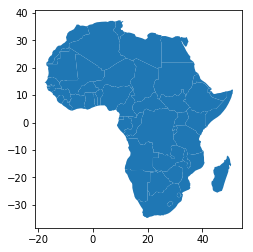

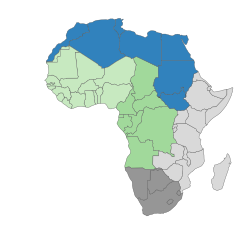

In [29]:
#https://geopandas.readthedocs.io/en/latest/gallery/plotting_basemap_background.html
from matplotlib import cm
cmap = cm.get_cmap('tab20c')
fig, ax = plt.subplots()
africa.plot(column='Cervix2002', cmap=cmap, linewidth=0.3, ax=ax, edgecolor='.3')
ax.axis('off')
plt.show()

In [30]:
africa.sample()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Region,Cervix2002,Cervix2008,Cervix2012,Cervix2018
49,2214858,Africa,Botswana,BWA,35900.0,"POLYGON ((29.43219 -22.09131, 28.01724 -22.827...",South,38.2,26.8,31.5,43.1


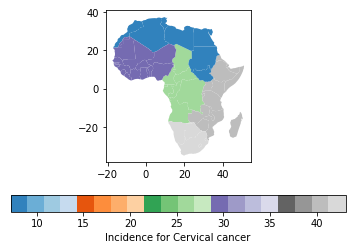

In [31]:
fig, ax = plt.subplots(1, 1)
#africa.plot(column='Lung2002');
africa.plot(column='Cervix2018', cmap=cmap,
            ax=ax, legend=True, 
            legend_kwds={'label': "Incidence for Cervical cancer", 'orientation': "horizontal"})
plt.show()

ValueError: Colormap Red is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [32]:
#!pip install mapclassify
import mapclassify

In [33]:
import matplotlib.pyplot as plt
import geopandas
cmap = cm.get_cmap('PuRd')

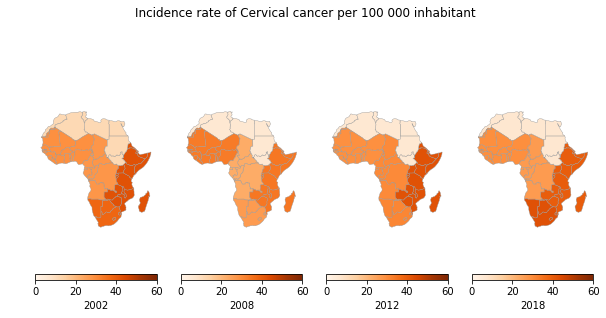

In [34]:
cmap = cm.get_cmap('YlGn')
#cmap = cm.get_cmap('winter')
#cmap = cm.get_cmap('tab20c')
#cmap = cm.get_cmap('YlOrRd')
#cmap = cm.get_cmap('Greens')
#cmap = cm.get_cmap('tab20c')
#cmap = cm.get_cmap('Set2')
#from cartopy import crs as ccrs
# Generate a figure with two axes, one for CartoPy, one for GeoPandas
vmin, vmax =0, 60
cmap = cm.get_cmap('Oranges')

fig, axs = plt.subplots(1,4,figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle('Incidence rate of Cervical cancer per 100 000 inhabitant')
# Make the CartoPy plot
line1 = africa.plot(column="Cervix2002", cmap=cmap, legend=True, linewidth=0.4, ax=axs[0], edgecolor='0.6',
            legend_kwds={'label': "2002", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)

line2 = africa.plot(column="Cervix2008", cmap=cmap, legend=True, linewidth=0.4, ax=axs[1], edgecolor='0.6',
            legend_kwds={'label': "2008", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)

line3 = africa.plot(column="Cervix2012", cmap=cmap, legend=True, linewidth=0.4, ax=axs[2], edgecolor='0.6',
            legend_kwds={'label': "2012", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)

line4 = africa.plot(column="Cervix2018", cmap=cmap, legend=True, linewidth=0.4, ax=axs[3], edgecolor='0.6',
            legend_kwds={'label': "2018", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)
#plt.colorbar(label='log$_{10}$(population)')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[3].axis('off')
plt.savefig('Figures/cervi1.png')
plt.show()

In [35]:
cancer

,2002,2008,2012,2018
North,12.1,6.6,6.6,7.2
West,29.3,33.7,29.3,29.6
Central,28.0,23.0,30.6,26.8
East,42.7,34.5,42.7,40.1
South,38.2,26.8,31.5,43.1


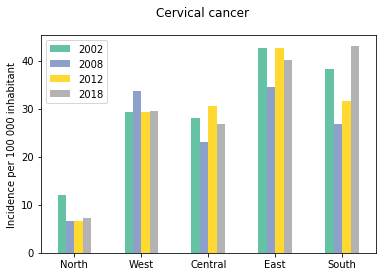

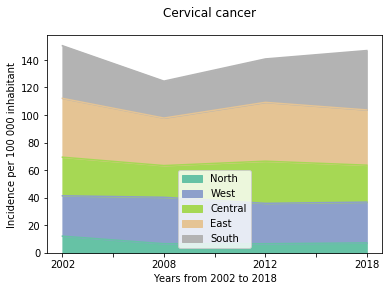

In [36]:
#cmap = cm.get_cmap('YlGn')
cmap = cm.get_cmap('winter')
#cmap = cm.get_cmap('tab20c')
cmap = cm.get_cmap('Set2')
ax = cancer.plot.bar(rot=0, cmap=cmap)
plt.suptitle('Cervical cancer')
plt.ylabel('Incidence per 100 000 inhabitant')
plt.savefig('Figures/cervi2.png')
plt.show()
cancer.transpose().plot.area(cmap=cmap)
plt.suptitle('Cervical cancer')
plt.ylabel('Incidence per 100 000 inhabitant')
plt.xlabel('Years from 2002 to 2018')
plt.savefig('Figures/cervi3.png')
plt.show()

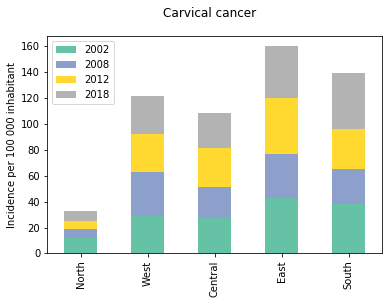

In [37]:
cancer.plot(kind='bar', stacked=True, cmap=cmap)
plt.suptitle('Carvical cancer')
plt.ylabel('Incidence per 100 000 inhabitant')
plt.savefig('Figures/cervi4.png')
plt.show()

In [38]:
fat

,2002,2008,2012,2018
North,80.991736,60.606061,48.484848,70.833333
West,81.228669,71.216617,63.139932,77.702703
Central,82.142857,73.913043,72.549020,78.731343
East,81.030445,73.333333,64.637002,74.812968
South,59.162304,55.223881,56.825397,46.403712


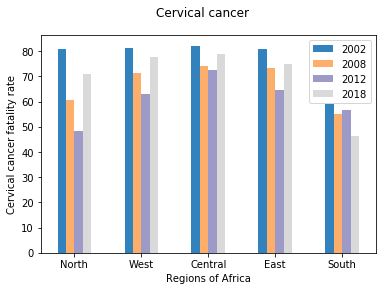

In [39]:
#cmap = cm.get_cmap('YlGn')
cmap = cm.get_cmap('tab20c')
#cmap = cm.get_cmap('tab20c')
#cmap = cm.get_cmap('YlOrRd')
#cmap = cm.get_cmap('Set2')
fat.plot.bar(rot=0, cmap=cmap)
plt.xlabel('Regions of Africa')
plt.suptitle('Cervical cancer')
plt.ylabel('Cervical cancer fatality rate')
plt.savefig('Figures/cervi5.png')
plt.show()